In [1]:
import re
import glob
import matplotlib.pyplot as plt

# Experiment #1: No. of Convolution Layers in CNN

In [2]:
def extract_numbers_from_file(filename):
    file = open(filename, "r")
    epochs = []
    train_losses = []
    train_accs = []
    val_losses = []
    val_accs = []
    for line in file.readlines():
        train = re.findall("Training Loss.*|$", line)
        if len(train) > 2:
            train = train[0].split() #split string into list of words/characters delimited by whitespace
            epoch_no = float(train[4][:-1]) #takes 5th element of list as epoch number. removes last colon character and convert to float
            epochs.append(epoch_no)
            train_loss = float(train[5]) #takes 6th element of list as training loss and convert to float
            train_losses.append(train_loss)
            train_acc = float(train[8][:-1]) #takes 9th element of list as training accuracy. removes last % character and convert to float
            train_accs.append(train_acc)

        val = re.findall("Validation Loss.*|$", line)
        if len(val) > 2:
            val = val[0].split() #split string into list of words/characters delimited by whitespace
            val_loss = float(val[5]) #takes 6th element of list as validation loss and convert to float
            val_losses.append(val_loss)
            val_acc = float(val[8][:-1]) #takes 9th element of list as validation accuracy. removes last % character and convert to float
            val_accs.append(val_acc)
    return epochs, train_losses, train_accs, val_losses, val_accs

In [3]:
trial_logfile = "log/cnn_lstm_512_6_1_512_drop25.log"
extract_numbers_from_file(trial_logfile)

([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0],
 [2.303717,
  2.266218,
  2.18176,
  1.950077,
  1.516864,
  1.096868,
  0.981877,
  0.943166,
  0.864507,
  0.826622,
  0.815658],
 [10.14, 23.25, 38.62, 40.39, 53.82, 74.98, 81.26, 83.99, 87.13, 86.73, 87.85],
 [2.305495,
  2.307356,
  2.315972,
  2.480226,
  2.600204,
  2.44879,
  2.47412,
  2.49723,
  2.452426,
  2.519527,
  2.519811],
 [9.79, 10.31, 7.22, 7.73, 10.31, 13.92, 10.82, 13.92, 13.4, 11.86, 10.82])

In [20]:
def plot_graphs(general_filepath, experiment_name):
    dictionary = {'No. of Convo Layers in CNN': [2,3,4,5,6],
                 'Dropout Rate of Latent Vector': [0.1, 0.25, 0.50, 0.80],
                 'Weight Decay of Optimizer': [0, '1e^-5', '1e^-6', '1e^-7', '1e^-8'],
                 'With Attention': ['with attention'], 
                 'VGG11': ['VGG w/ 11\nlayers']}
    files = glob.glob(general_filepath, recursive = True)
    files = sorted(files)
    if general_filepath == 'log/cnn_lstm_512_6_1_512*.log':
        files = files[:4]
    fig, axs = plt.subplots(2, 2, figsize = (15, 15))
    fig.suptitle(experiment_name, fontsize = 25, fontweight = 'bold')
    for file in files:
        index = files.index(file)
        legend = dictionary[experiment_name][index]
        epochs, train_losses, train_accs, val_losses, val_accs = extract_numbers_from_file(file)
        axs[0, 0].plot(epochs, train_losses, label = legend)
        axs[0, 0].set_ylabel("average training loss", fontsize = 15)
        axs[0, 0].set_xlabel("epoch number", fontsize = 15)
        axs[0, 0].legend(loc="upper right")
        axs[0, 1].plot(epochs, train_accs, label = legend)
        axs[0, 1].set_ylabel("average training accuracy", fontsize = 15)
        axs[0, 1].set_xlabel("epoch number", fontsize = 15)
        axs[0, 1].legend(loc="upper right")
        axs[1, 0].plot(epochs, val_losses, label = legend)
        axs[1, 0].set_ylabel("average validation loss", fontsize = 15)
        axs[1, 0].set_xlabel("epoch number", fontsize = 15)
        axs[1, 0].legend(loc="upper right")
        axs[1, 1].plot(epochs, val_accs, label = legend)
        axs[1, 1].set_ylabel("average validation accuracy", fontsize = 15)
        axs[1, 1].set_xlabel("epoch number", fontsize = 15)
        axs[1, 1].legend(loc="upper right")


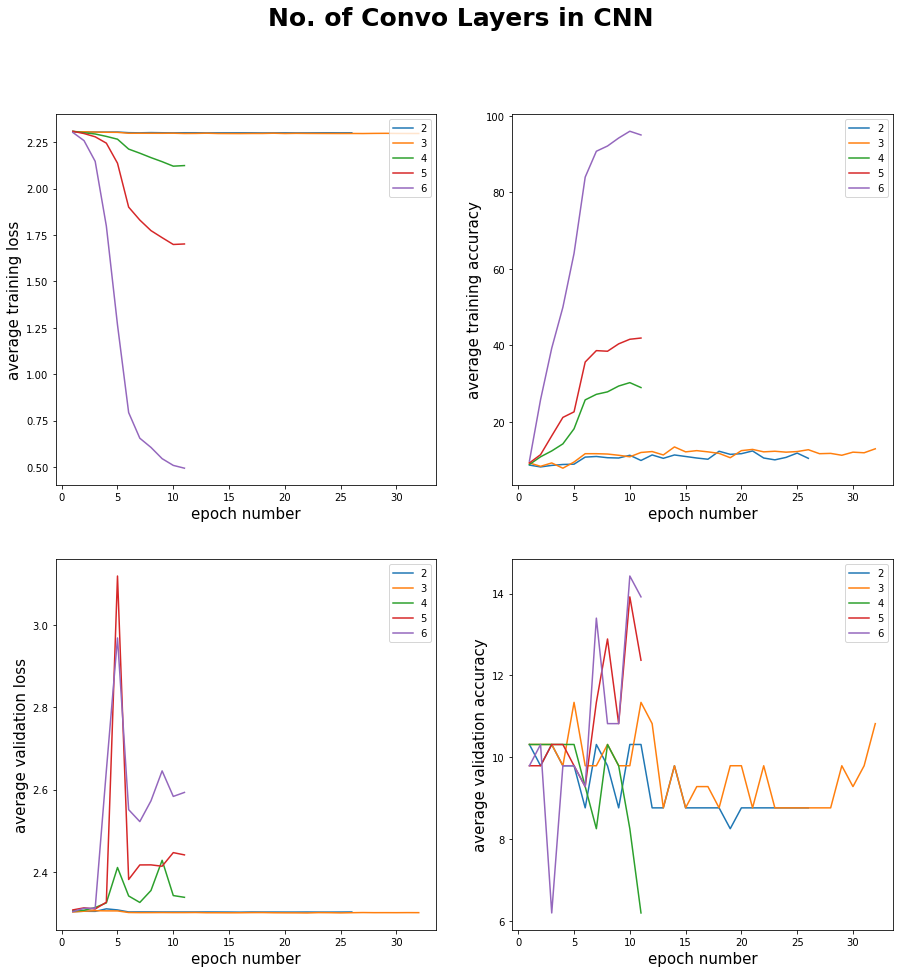

In [21]:
plot_graphs('log/cnn_lstm_512_*_1_512.log', 'No. of Convo Layers in CNN')

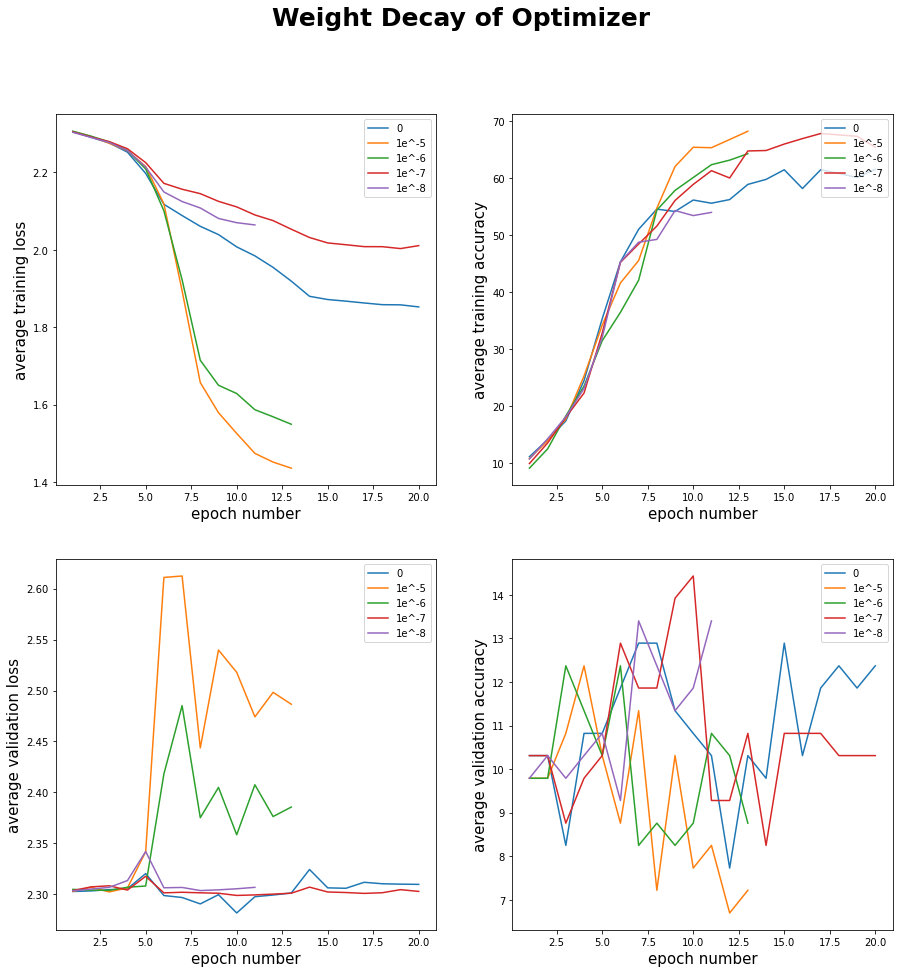

In [22]:
plot_graphs('log/cnn_lstm_512_6_1_512_drop80*.log', 'Weight Decay of Optimizer')

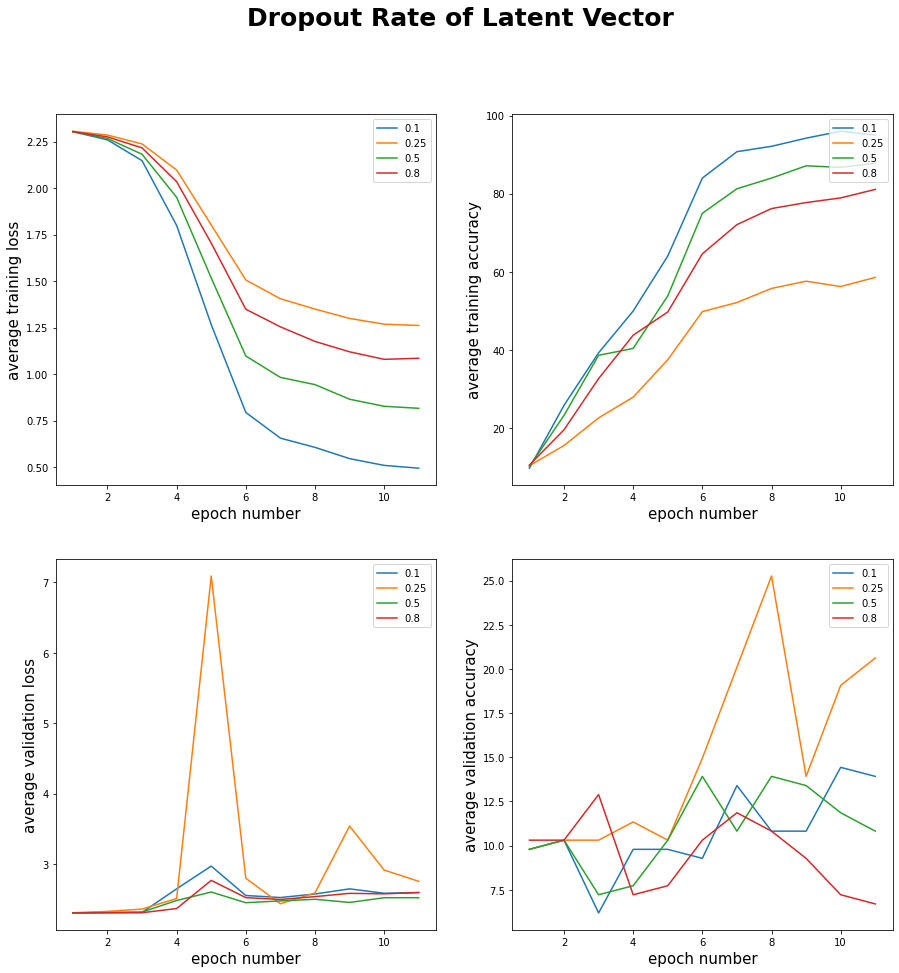

In [23]:
plot_graphs('log/cnn_lstm_512_6_1_512*.log', 'Dropout Rate of Latent Vector')

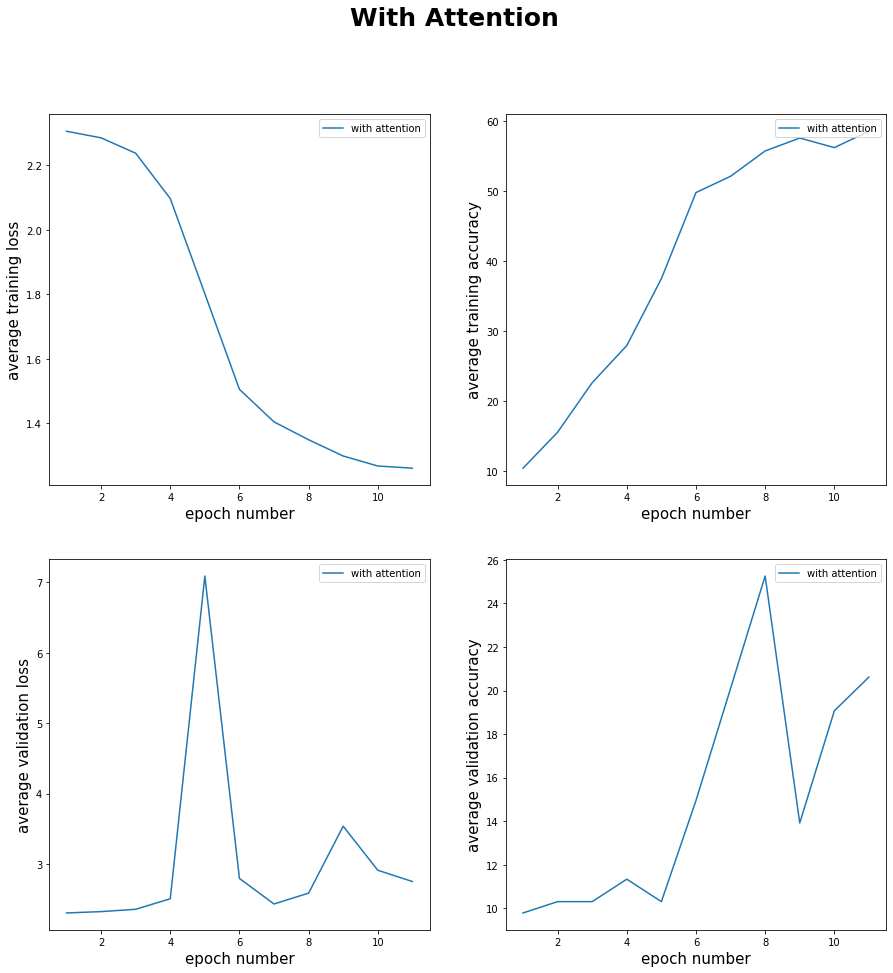

In [24]:
plot_graphs('log/cnn_lstm_512_6_1_512_bidir_drop80_attn.log', 'With Attention')

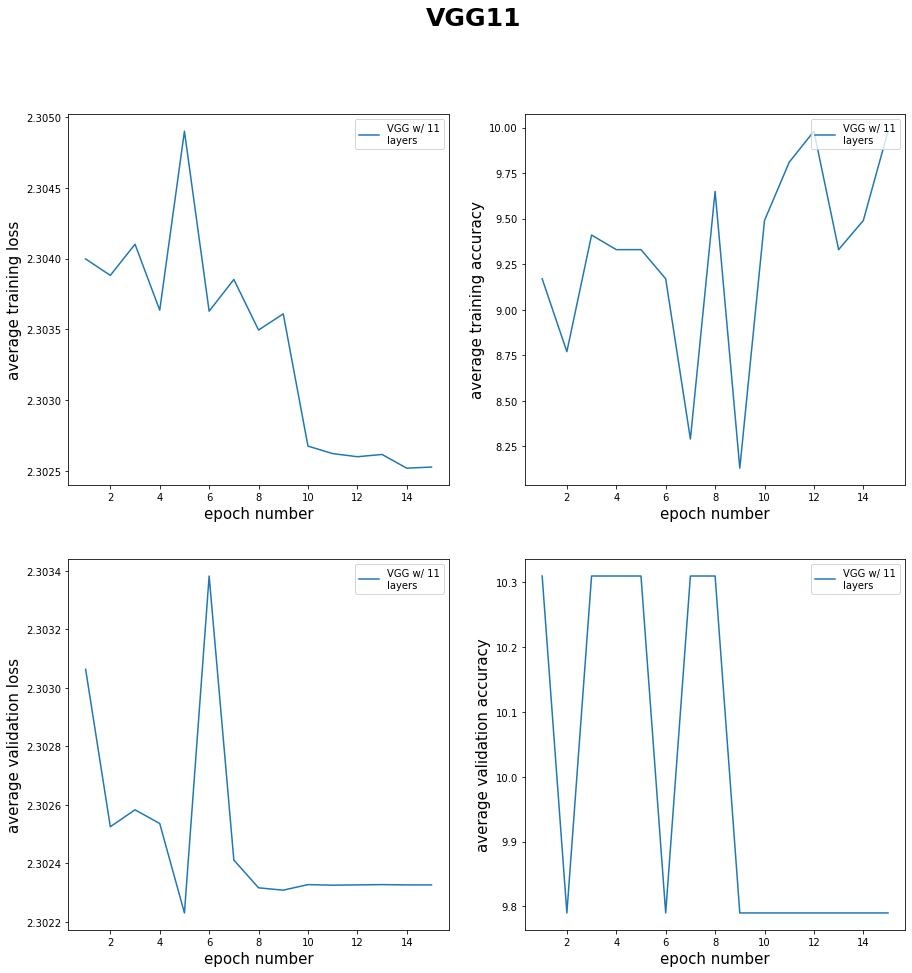

In [26]:
plot_graphs('log/vgg11_lstm_512_2_512.log', 'VGG11')